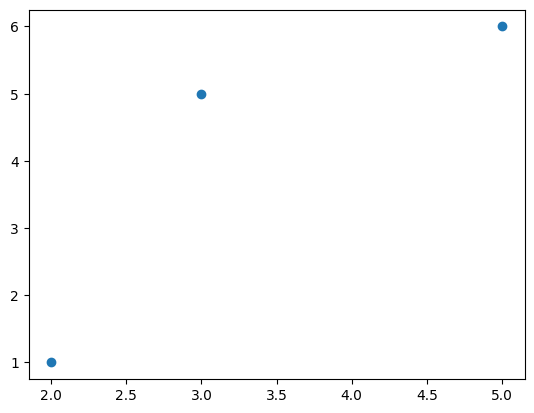

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2, 3, 5])
y = np.array([1, 5, 6])

plt.scatter(x, y)

In [5]:
import sympy as sym

theta = sym.Symbol('theta')

hypothesis = theta * x
hypothesis


array([2*theta, 3*theta, 5*theta], dtype=object)

In [7]:
error = hypothesis - y
error

array([2*theta - 1, 3*theta - 5, 5*theta - 6], dtype=object)

In [8]:
error ** 2

array([(2*theta - 1)**2, (3*theta - 5)**2, (5*theta - 6)**2], dtype=object)

In [10]:
cost = np.mean(error ** 2)
cost

(2*theta - 1)**2/3 + (3*theta - 5)**2/3 + (5*theta - 6)**2/3

In [12]:
cost = cost.expand()
cost

38*theta**2/3 - 94*theta/3 + 62/3

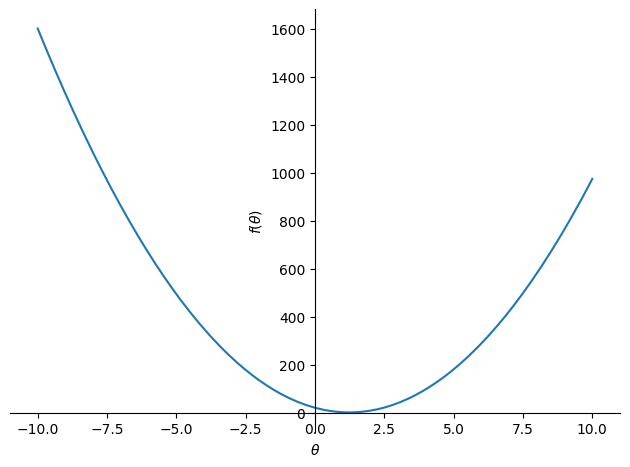

In [14]:
from sympy.plotting import plot

plot(cost);

In [15]:
diff_cost = sym.diff(cost, theta)
diff_cost

76*theta/3 - 94/3

In [17]:
from sympy.solvers import solve

min_value = solve(diff_cost, theta)
min_value

[47/38]

In [18]:
from sympy.utilities.lambdify import lambdify

cost_f = lambdify(theta, cost)
diff_cost_f = lambdify(theta, diff_cost)

In [19]:
def draw_proc(x_val):
    t = np.arange(0, 5, 0.01)
    t_diff = np.arange(x_val-0.5, x_val+0.5, 0.01)
    plt.figure(figsize=(10,8))
    plt.plot(t, cost_f(t))
    plt.plot(t_diff, diff_cost_f(x_val)*(t_diff - x_val) + cost_f(x_val))
    plt.scatter([x_val], [cost_f(x_val)], s=100, c='red')
    plt.grid()

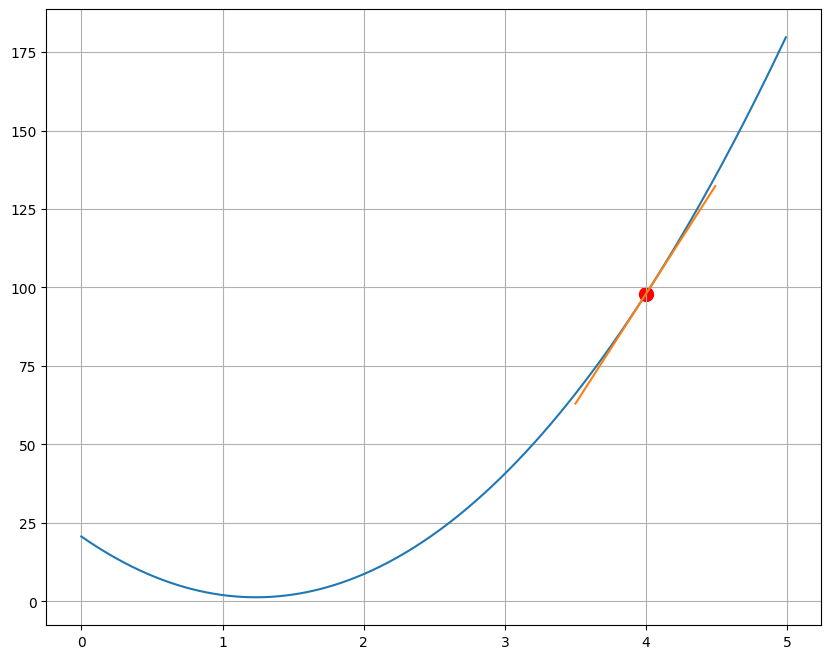

In [20]:
x_val = 4
draw_proc(x_val)

In [21]:
def cal_next_step(x_val):
    lr = 0.01
    current_diff = diff_cost_f(x_val)
    current_step = lr*current_diff
    print("Current interval : ", current_step)
    print("Next X_val : ", x_val - current_step)
    return x_val - current_step

Current interval :  0.21757304730864188
Next X_val :  1.8781100341728394


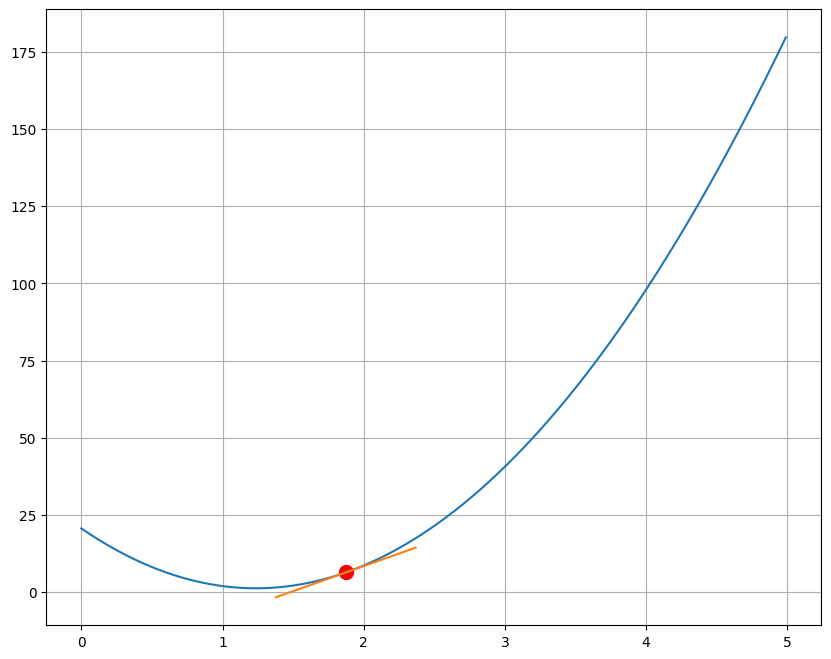

In [26]:
x_val = cal_next_step(x_val)
draw_proc(x_val)

In [27]:
import tensorflow as tf

In [28]:
def linear_reg(x):
    return x*W

def mean_squared_error(y_pred, y):
    return tf.reduce_sum(tf.pow(y_pred - y, 2)) / (2*n_samples)

In [29]:
lr = 0.001
num_iter = 500
n_samples = x.shape[0]
hist_W = []

W = tf.Variable(np.random.randn())

hist_W.append(W.numpy())
print(W.numpy())

-0.69528496


In [30]:
W.numpy()

-0.69528496

In [31]:
for n in range(num_iter):
    with tf.GradientTape() as tape:
        y_hat = linear_reg(x)
        loss = mean_squared_error(y_hat, y)

    updated = tape.gradient(loss, W)
    W.assign_sub(lr * updated)

    hist_W.append(W.numpy())
    if n%50==0:
        print(n, '\t', ' : Loss : ', loss.numpy(), ' , Weight : ', W.numpy())

0 	  : Loss :  24.287802  , Weight :  -0.67081136
50 	  : Loss :  7.2529445  , Weight :  0.22831061
100 	  : Loss :  2.4917223  , Weight :  0.7036553
150 	  : Loss :  1.1609672  , Weight :  0.9549588
200 	  : Loss :  0.78902274  , Weight :  1.087817
250 	  : Loss :  0.6850643  , Weight :  1.1580563
300 	  : Loss :  0.6560083  , Weight :  1.19519
350 	  : Loss :  0.64788723  , Weight :  1.2148213
400 	  : Loss :  0.64561737  , Weight :  1.2251999
450 	  : Loss :  0.64498293  , Weight :  1.2306871


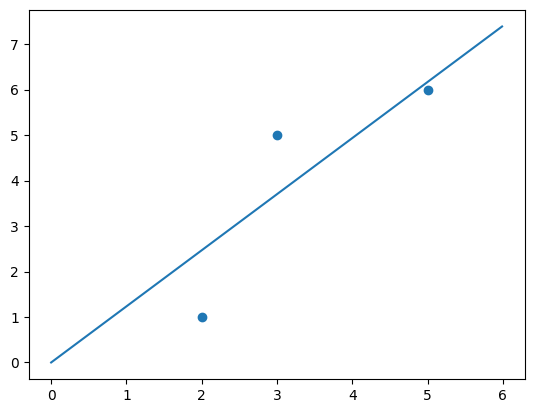

In [33]:
x = np.array([2, 3, 5])
y = np.array([1, 5, 6])
t = np.arange(0, 6, 0.01)

plt.scatter(x, y);
plt.plot(t, t*W);

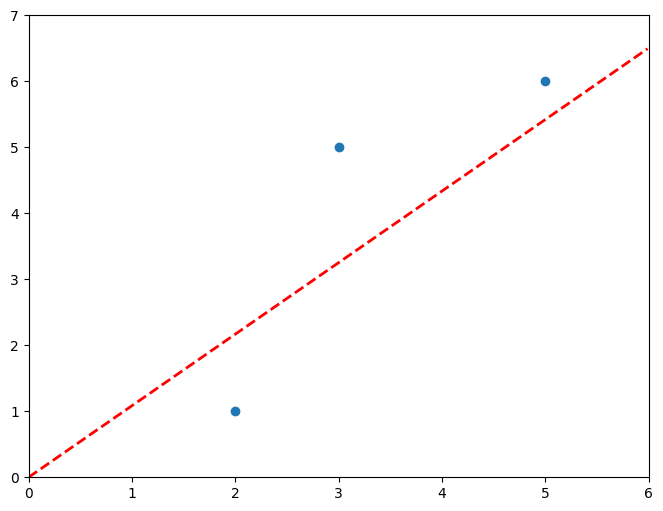

In [34]:
from matplotlib import animation

fig = plt.figure(figsize=(8,6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 7))
dots = ax.scatter(x, y)
line, = ax.plot([], [], lw=2, ls='dashed', color='red')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    t = np.arange(0, 6, 0.01)
    line.set_data(t, t*hist_W[i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

anim.save('exAnimation.gif', writer='pillow', fps=30, dpi=100)

plt.show()

In [ ]:
# https://pinkwink.kr/1376#recentEntries